In [1]:
def power2(x):
    ans = 1
    if x and not(x&(x-1)):
        return x
    while ans<x:
        ans <<=1
    return ans

In [2]:
def util(arr, l):
    if l == 1:
        return arr
    mid = l//2
    new_arr = arr.copy()
    for i in range(mid):
        new_arr[i] = (arr[2*i] + arr[2*i+1])//2
        new_arr[i+mid] = arr[2*i] - new_arr[i]
    
    return util(new_arr, mid)
    

def transform(inp):
    l = len(inp)
    high = power2(l)

    while len(inp) < high:
        inp.append(0)
    
    transformed = util(inp, l)
    return transformed

In [3]:
transform([56, 40, 8, 24, 48, 48, 40, 16])

[35, -3, 16, 10, 8, -8, 0, 12]

In [4]:
threshold = 4

In [5]:
def inverseUtil(inp, l):
    if l == len(inp):
        return inp

    mid = l*2
    new_arr = inp.copy()
    for i in range(l):
        new_arr[2*i] = inp[i] + inp[i+l]
        new_arr[2*i+1] = inp[i] - inp[i+l]
    
    return inverseUtil(new_arr, mid)


def inverse(inp, threshold):
    l = len(inp)
    high = power2(l)
    
    while len(inp) < high:
        inp.append(0)
    
    inp = [0 if i < threshold else i for i in inp]
    
    transformed = inverseUtil(inp,1)
    return transformed

In [6]:
inverse(transform([56, 40, 8, 24, 48, 48, 40, 16]), 9)

[51, 51, 19, 19, 45, 45, 37, 13]

In [7]:
import matplotlib.pyplot as plt

def run():
    inp = [2,2,1,2,3,5,4,4]
    transformed = transform(inp)
    threshold = -10
    reduced = inverse(transformed, threshold)
    plt.plot(inp, label="Input data")
    plt.plot(transformed, label="Transformed data")
    plt.plot(reduced, label="Reconstructed data")
    plt.legend()
    plt.show()

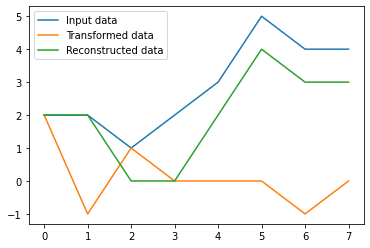

In [8]:
run()